Calculéis las métricas para vuestro modelo ¿Es buenos haciendo predicciones?

Discutid los resultados de las métricas y extraed conclusiones

Guardad los resultados de las métricas en un csv para usarlo más adelante.

In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Modelado y evaluación
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


#  Crossvalidation
# ------------------------------------------------------------------------------
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
df = pd.read_csv("Datos/possum_completo.csv", index_col = 0)
df

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,...,belly,age_norm,age_log,age_raiz,age_Sklearn,belly_esta,x0_Vic,x0_other,sex_f,sex_m
0,1,1,Vic,m,8.0,-0.028932,60.4,89.0,36.0,74.5,...,0.150424,0.522837,2.079442,2.828427,0.625,1.235889,1.0,0.0,0,1
1,2,1,Vic,f,6.0,0.392875,57.6,91.5,36.5,72.5,...,0.514241,0.272837,1.791759,2.449490,0.625,0.149699,1.0,0.0,1,0
2,3,1,Vic,f,6.0,0.167912,60.0,95.5,39.0,75.4,...,0.514241,0.272837,1.791759,2.449490,0.625,0.511762,1.0,0.0,1,0
3,4,1,Vic,f,6.0,-0.310136,57.1,92.0,38.0,76.1,...,0.150424,0.272837,1.791759,2.449490,0.125,0.511762,1.0,0.0,1,0
4,5,1,Vic,f,2.0,0.139791,56.3,85.5,36.0,71.0,...,-0.213392,-0.227163,0.693147,1.414214,0.000,0.149699,1.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,1.0,-1.125630,56.0,81.5,36.5,66.0,...,0.150424,-0.352163,0.000000,1.000000,0.000,-2.022680,0.0,1.0,0,1
100,101,7,other,m,1.0,-0.057052,54.7,82.5,39.0,64.4,...,-0.941025,-0.352163,0.000000,1.000000,0.625,0.149699,0.0,1.0,0,1
101,102,7,other,f,6.0,-0.310136,55.0,89.0,38.0,63.5,...,-1.304842,0.272837,1.791759,2.449490,0.375,-0.936490,0.0,1.0,1,0
102,103,7,other,m,4.0,0.280394,55.2,82.5,36.5,62.9,...,0.332332,0.022837,1.386294,2.000000,0.250,-1.298554,0.0,1.0,0,1


In [3]:
X = df[["chest", "belly", "hdlngth"]]
y = df["age"]

In [4]:
X = X.drop([103], axis = 0)

In [5]:
y = y.drop([103], axis = 0)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 

In [7]:
lr = LinearRegression(n_jobs=-1) 

In [8]:
lr.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [9]:
y_predict_train = lr.predict(x_train)
y_predict_test = lr.predict(x_test)

In [10]:
train_df = pd.DataFrame({'Real': y_train, 'Predicted': y_predict_train, 'Set': ['Train']*len(y_train)})
test_df  = pd.DataFrame({'Real': y_test,  'Predicted': y_predict_test,  'Set': ['Test']*len(y_test)})
resultados = pd.concat([train_df,test_df], axis = 0)
resultados.head()

,Real,Predicted,Set
53,7.0,4.008138,Train
22,4.0,3.774166,Train
68,5.0,3.738764,Train
44,3.0,3.520270,Train
98,3.0,3.521588,Train


In [11]:
resultados['residuos'] = resultados['Real'] - resultados['Predicted']
resultados.head()

,Real,Predicted,Set,residuos
53,7.0,4.008138,Train,2.991862
22,4.0,3.774166,Train,0.225834
68,5.0,3.738764,Train,1.261236
44,3.0,3.520270,Train,-0.520270
98,3.0,3.521588,Train,-0.521588


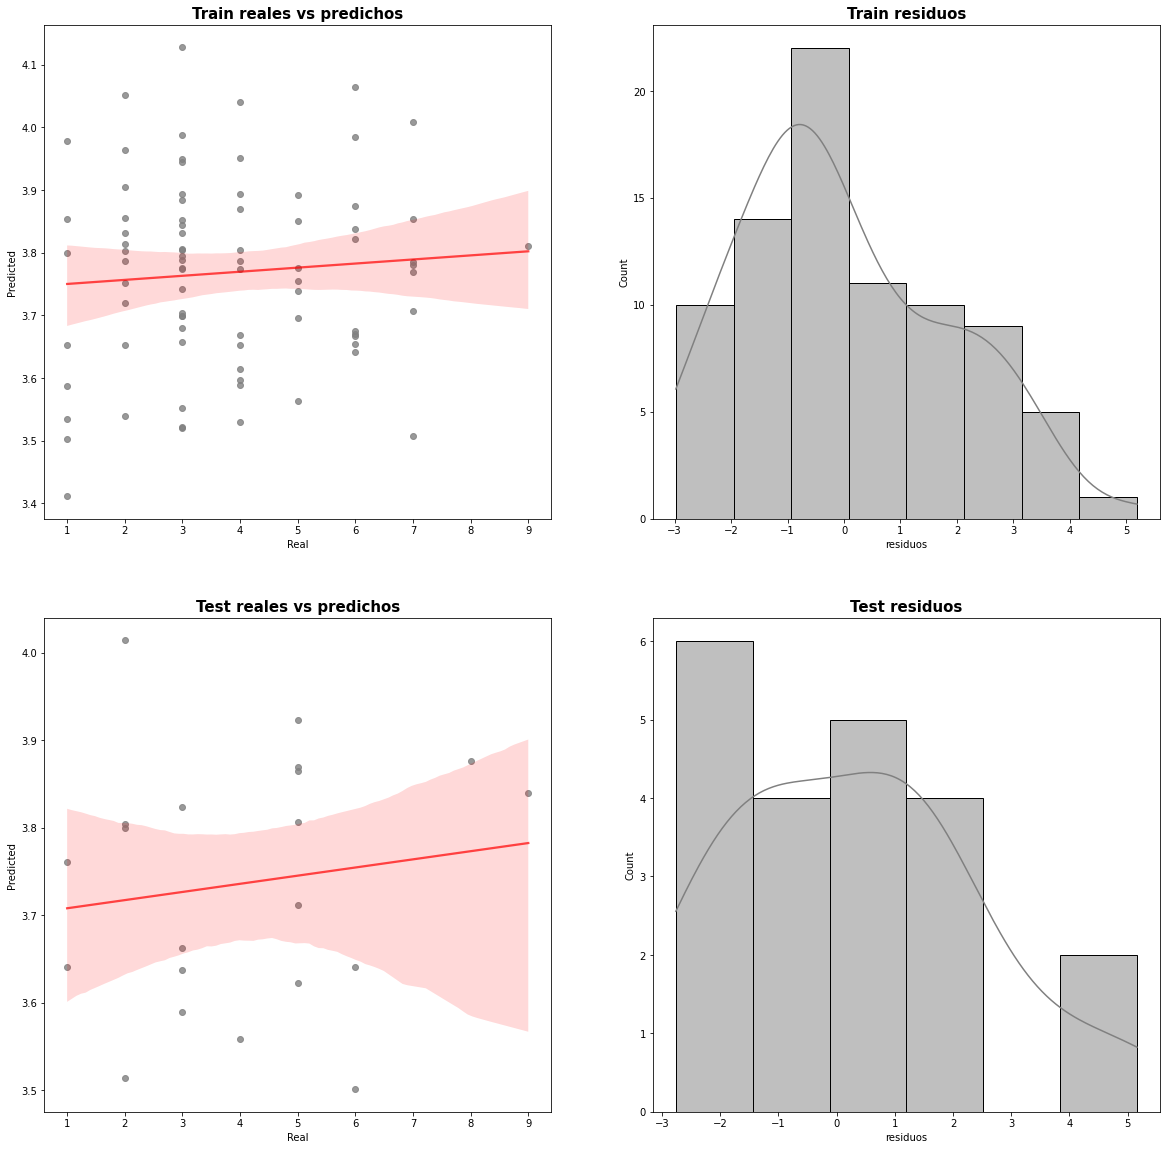

In [12]:
fig, ax = plt.subplots(2,2,figsize=(20,20))


# ploteamos los reales vs los predichos
sns.regplot(data = resultados[resultados['Set'] == "Train"], 
            x = "Real", 
            y = "Predicted", 
            ax = ax[0,0], 
            color = "grey",
            line_kws = {"color": "red", "alpha": 0.7 })


sns.regplot(data = resultados[resultados['Set'] == "Test"], 
            x = "Real",
            y = "Predicted", 
            color = "gray",
            line_kws = {"color": "red", "alpha": 0.7 }, 
            ax = ax[1,0])


# ploteamos los residuos
sns.histplot(resultados[resultados['Set'] == "Train"],
             x="residuos",
             color ="grey",
             kde=True, 
             ax = ax[0,1])


sns.histplot(resultados[resultados['Set'] == "Test"],
             x="residuos",
             color = "grey",
             kde=True, 
             ax = ax[1,1])

ax[0,0].set_title("Train reales vs predichos", fontsize = 15, fontweight = "bold")
ax[0,1].set_title("Train residuos", fontsize = 15, fontweight = "bold")
ax[1,0].set_title("Test reales vs predichos", fontsize = 15, fontweight = "bold")
ax[1,1].set_title("Test residuos", fontsize = 15, fontweight = "bold");

In [13]:
# Para el conjunto de entrenamsiento las méticas han sido
print('Para el conjunto train:---------------')
print('El valor de r2 score es ',r2_score(y_train,y_predict_train))
print('El MAE es',mean_absolute_error(y_train,y_predict_train))
print('El MSE es',mean_squared_error(y_train,y_predict_train))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_train,y_predict_train)))


# Para el conjunto de test las métricas han sido
print('Para el conjunto test:---------------')
print('El valor de r2 score es ',r2_score(y_test,y_predict_test))
print('El MAE es',mean_absolute_error(y_test,y_predict_test))
print('El MSE es',mean_squared_error(y_test,y_predict_test))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_test,y_predict_test)))

Para el conjunto train:---------------
El valor de r2 score es  0.006516413840988444
El MAE es 1.5092076645995682
El MSE es 3.326928897909349
EL RMSE es  1.8239870881969942
Para el conjunto test:---------------
El valor de r2 score es  -0.007586405175207922
El MAE es 1.7635156651015667
El MSE es 4.459883589346952
EL RMSE es  2.1118436469935347
